In [1]:
import sys
sys.path.append('/home/sole-pie01/mycodes/pyrat/build/python')
import pyrat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ts = pyrat.ThermalScattering('scattering_law_dict.pkl', 40.87268, 0.99917, 2, 293.6, True, True)

ts.inel_xs(1e-5)

Loaded alpha_grid, beta_grid, and S(alpha, beta) from the dictionary.


8.585300356651345e+193

In [3]:
ts.inel_xs(1e-5)/800.4919

40.89480581375043

In [2]:
# Define alpha and beta grids
alpha_grid = np.linspace(0.0, 50.0, 100)
# Initial beta grid (will be redefined in the class)
beta_grid = np.linspace(-50.0, 50.0, 200)

# Create an instance of ThermalScattering
ts = pyrat.ThermalScattering(alpha_grid.tolist(), beta_grid.tolist(), n_max=20)

# Define peak positions and intensities
peak_positions = [5.0, 15.0, 25.0]  # Example peak positions
peak_intensities = [1.0, 0.8, 0.6]  # Example intensities

# Set non-uniform beta grid
ts.set_nonuniform_beta_grid(-50.0, 50.0, peak_positions)

# Initialize phonon spectrum
ts.initialize_phonon_spectrum(peak_positions, peak_intensities)

# Compute S(alpha, beta)
ts.compute_S_alpha_beta()

# Normalize and enforce symmetry
ts.normalize_S_alpha_beta()
ts.enforce_symmetry()

# Get S(alpha, beta) as a NumPy array
S_alpha_beta = ts.get_S_alpha_beta()



In [ ]:
# Plotting the results

# 1. Heatmap of S(alpha, beta)
plt.figure(figsize=(8, 6))
plt.imshow(S_alpha_beta, extent=[beta_grid[0], beta_grid[-1], alpha_grid[0], alpha_grid[-1]],
           aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='S(alpha, beta)')
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.title('Heatmap of S(alpha, beta)')
plt.grid(True)
plt.show()

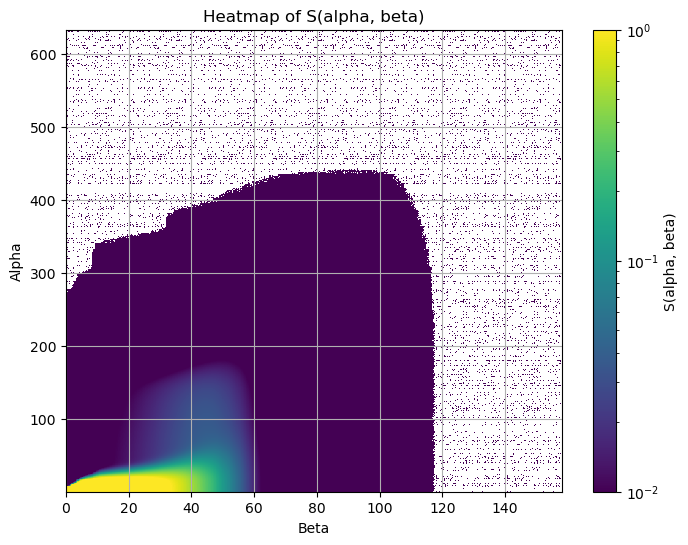

In [11]:
import pickle
from matplotlib.colors import LogNorm

# Load the pickled dictionary
with open('scattering_law_dict.pkl', 'rb') as file:
    loaded_scattering_law_dict = pickle.load(file)

alpha_grid = loaded_scattering_law_dict['alpha_grid']
beta_grid = loaded_scattering_law_dict['beta_grid']
S_matrix = loaded_scattering_law_dict['S_matrix']

plt.figure(figsize=(8, 6))
plt.imshow(S_matrix, extent=[beta_grid[0], beta_grid[-1], alpha_grid[0], alpha_grid[-1]],
           aspect='auto', origin='lower', cmap='viridis', norm=LogNorm(vmin=0.01, vmax=1))
plt.colorbar(label='S(alpha, beta)')
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.title('Heatmap of S(alpha, beta)')
plt.grid(True)
plt.show()

Loaded alpha_grid, beta_grid, and S(alpha, beta) from the dictionary.


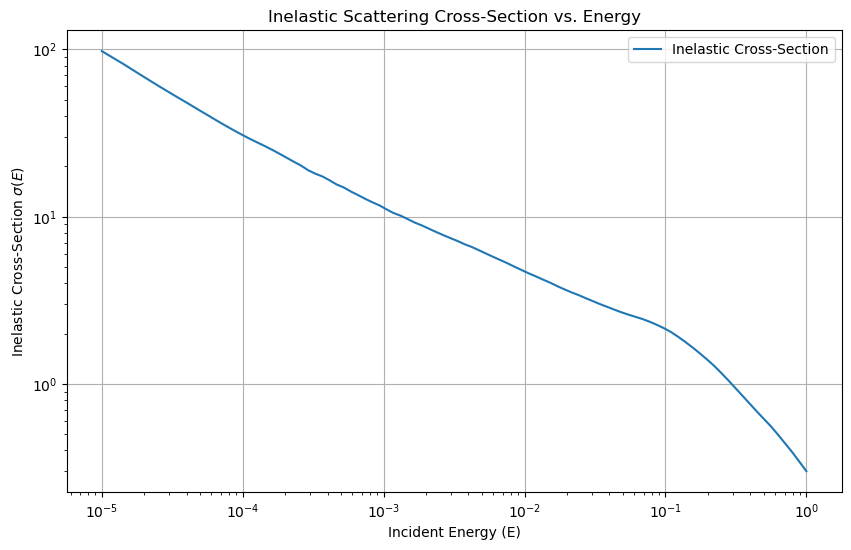

In [2]:
ts = pyrat.ThermalScattering('scattering_law_dict.pkl', 40.87268, 0.99917, 2, 293.6, True, True)

# Define a range of incident energies (in meV or eV, depending on your units)
energy_range = np.logspace(-5, 0, 100)  # Adjust the range as needed

# Compute the inelastic cross-section for each energy
inel_xs_values = [ts.inel_xs(E) for E in energy_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(energy_range, inel_xs_values, label='Inelastic Cross-Section')
plt.xlabel('Incident Energy (E)')
plt.ylabel('Inelastic Cross-Section $\sigma(E)$')
plt.title('Inelastic Scattering Cross-Section vs. Energy')
plt.legend()
plt.grid(True)
plt.show()